-------

## Python Libraries

We use the following Python libraries which need to be imported. If you have no experience with the [NumPy](https://numpy.org/) library, read the documentation and do some tutorials. It is very important for matrix operations in Python.

In [4]:
# Install the required python library with pip
!pip install control

-------

## Installation
We use the [Python library](https://python-control.readthedocs.io/en/0.9.3.post2/) `control`, which can be installed using `pip`. If you have no experience with Python, try to do some tutorials (e.g. check [this](https://docs.python.org/3/tutorial/) one). The same goes for installing Python packages using `pip`, see this [tutorial](https://packaging.python.org/en/latest/tutorials/installing-packages/). There are plenty of other Python tutorials for beginners if you do a Google/YouTube search.

If you have done all the Jupyter Notebooks leading up to this one, you should have all the necessary libraries installed. 


In [5]:
# Import the required python libraries
!pip install widget
!pip install ipympl
%matplotlib widget
from typing import Optional, List, Tuple
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import control as ct
import pandas as pd

ERROR: Could not find a version that satisfies the requirement widget (from versions: none)
ERROR: No matching distribution found for widget


--------
## Exercise 1a:

Please complete the following function to calculate the 2-norm and infinity-norm of a vector.

$||x||_2 = \sqrt{\Sigma_i |x_i|^2}$

$||x||_{\infty} = \max{|x_i|}$

In [6]:
def vector2norm(vector: np.ndarray) -> float:
    """
    Calculate the 2-norm (Euclidean norm) of a NumPy array.

    Parameters:
    vector (np.ndarray): Input array for which 2-norm is to be calculated.

    Returns:
    float: The 2-norm of the input array.
    """
    if len(vector) == 0 or vector is None or not isinstance(vector, np.ndarray):
        raise ValueError("Input vector is invalid")
    
    squared_sum = 0.0
    for elem in vector:
        squared_sum += elem**2
    norm = np.sqrt(squared_sum)

    return norm

In [7]:
def vectorInfnorm(vector: np.ndarray) -> float:
    """
    Calculate the infinity-norm (maximum absolute value) of a NumPy array.

    Parameters:
    vector (np.ndarray): Input array for which infinity-norm is to be calculated.

    Returns:
    float: The infinity-norm of the input array.
    """
    if len(vector) == 0 or vector is None or not isinstance(vector, np.ndarray):
        raise ValueError("Input vector is invalid")
    
    max_elem = 0.0
    for elem in vector:
        if abs(elem) > max_elem:
            max_elem = abs(elem)

    return max_elem

## Exercise 1b

Below you find an outline for the p-norm of a vector. Please complete the function.

$||x||_p = (\Sigma_i |x_i|^p)^{\frac{1}{p}}$

Complete the small adjustments needed to make 'vectorPnorm(vector, p)' also work with floating-point variables 'p'.

In [8]:
def vectorPnorm(vector: np.ndarray, p: float) -> float:
    """
    Calculate the p-norm (maximum absolute value) of a NumPy array.

    Parameters:
    vector (np.ndarray): Input array for which p-norm is to be calculated.

    Returns:
    float: The p-norm of the input array.
    """
    if len(vector) == 0 or vector is None or not isinstance(vector, np.ndarray):
        raise ValueError("Input vector is invalid")

    if p is None:
        return vector2norm(vector)

    p = float(p)
    if not isinstance(p, float) or p <= 0.0:
        raise ValueError("p must be a positive integer")

    norm_sum = 0.0
    for elem in vector:
        norm_sum += abs(elem)**p
    
    return norm_sum**(1/p)

Test your code below:

In [9]:
array = np.array([1, 2, 3, 4, 5])
norm2 = vector2norm(array)
norm3 = vectorPnorm(array, 3)
norm3_5 = vectorPnorm(array, 3.5)
norm4 = vectorPnorm(array, 4)

print(f"2-norm of {array} is {norm2}")
print(f"3-norm of {array} is {norm3}")
print(f"3.5-norm of {array} is {norm3_5}")
print(f"4-norm of {array} is {norm4}")
print(f"Inf-norm of {array} is {vectorInfnorm(array)}")

2-norm of [1 2 3 4 5] is 7.416198487095663
3-norm of [1 2 3 4 5] is 6.082201995573399
3.5-norm of [1 2 3 4 5] is 5.788317364864018
4-norm of [1 2 3 4 5] is 5.593654949523078
Inf-norm of [1 2 3 4 5] is 5


--------
## Exercise 2a:

Fill out the code for the following matrix norms:

$||G||_{2,ind} = \sqrt{\rho(G^*G)} = \sqrt{|\lambda_{max}(G^*G)|} = \overline{\sigma}(G)$

$||G||_{P,ind} = \sup_{\omega \neq 0}{\frac{||G\omega||_p}{||\omega||_p}} = \max_{||\omega||_p=1}{||G\omega||_p}$

$||G||_{\infty, ind} = max_i{\Sigma_j |g_{ij}|}$

In [10]:
def matrix2norm(matrix: np.ndarray) -> float:
    """
    Calculate the 2-norm of a matrix manually.

    Parameters:
    matrix (numpy.ndarray): Input matrix for which the 2-norm is to be calculated.

    Returns:
    float: The 2-norm of the input matrix.
    """
    if matrix is None or not isinstance(matrix, np.ndarray):
        raise ValueError("Input matrix is invalid")

    product_matrix = np.dot(matrix.T, matrix)
    eigenvalues, _ = np.linalg.eig(product_matrix)
    max_eigenvalue = np.max(eigenvalues)
    norm = np.sqrt(max_eigenvalue)
    return norm

For calculating the matrix P-norm, it makes sense to create a separate function that finds singular values from a matrix.

In [11]:
def calculate_matrix_singular_values(matrix: np.ndarray) -> np.ndarray:
    """
    Calculate the singular values of a matrix manually.

    Parameters:
    matrix (numpy.ndarray): Input matrix for which the singular values are to be calculated.

    Returns:
    numpy.ndarray: The singular values of the input matrix.
    """
    if matrix is None or not isinstance(matrix, np.ndarray):
        raise ValueError("Input matrix is invalid")

    product_matrix = np.dot(matrix.T, matrix) if matrix.shape[0] > matrix.shape[1] else np.dot(matrix, matrix.T)
    eigenvalues, _ = np.linalg.eig(product_matrix)
    singular_values = np.sqrt(np.abs(eigenvalues))
    return singular_values

def matrixPnorm(matrix: np.ndarray, p: float) -> float:
    """
    Calculate the p-norm of a matrix manually.

    Parameters:
    matrix (numpy.ndarray): Input matrix for which the p-norm is to be calculated.

    Returns:
    float: The p-norm of the input matrix.
    """
    if matrix is None or not isinstance(matrix, np.ndarray):
        raise ValueError("Input matrix is invalid")
    if p is None:
        return matrix2norm(matrix)
    p = float(p)
    if not isinstance(p, float) or p <= 0.0:
        raise ValueError("p must be a positive integer")

    singular_values = calculate_matrix_singular_values(matrix)
    norm = np.sum(np.abs(singular_values)**p)**(1.0/p)
    return norm

In [12]:
def matrixInfnorm(matrix: np.ndarray) -> float:
    """
    Calculate the infinity-norm of a matrix manually.

    Parameters:
    matrix (numpy.ndarray): Input matrix for which the infinity-norm is to be calculated.

    Returns:
    float: The infinity-norm of the input matrix.
    """
    if matrix is None or not isinstance(matrix, np.ndarray):
        raise ValueError("Input matrix is invalid")

    row_sums = np.sum(np.abs(matrix), axis=1)  # Calculate absolute row sums
    norm = np.max(row_sums)  # Take the maximum of the absolute row sums
    return norm


## Exercise 2b:

Test out the norms for some matrices!

In [13]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

norm2 = matrix2norm(matrix)
norm3 = matrixPnorm(matrix, 3)
norm3_5 = matrixPnorm(matrix, 3.5)
norm4 = matrixPnorm(matrix, 4)
normInf = matrixInfnorm(matrix)

print(f"2-norm of {matrix} is {norm2}")
print(f"3-norm of {matrix} is {norm3}")
print(f"3.5-norm of {matrix} is {norm3_5}")
print(f"4-norm of {matrix} is {norm4}")
print(f"Inf-norm of {matrix} is {normInf}")

2-norm of [[1 2 3]
 [4 5 6]
 [7 8 9]] is 16.848103352614213
3-norm of [[1 2 3]
 [4 5 6]
 [7 8 9]] is 16.849535224829065
3.5-norm of [[1 2 3]
 [4 5 6]
 [7 8 9]] is 16.84841243172686
4-norm of [[1 2 3]
 [4 5 6]
 [7 8 9]] is 16.84817145624563
Inf-norm of [[1 2 3]
 [4 5 6]
 [7 8 9]] is 24


--------
## Exercise 3:

For this exercise, a dataset from EWZ (Elektrizitätswerk der Stadt Zürich) is used. It contains the total energy used in the EWZ-Network on a 15-minute basis since 2015. 

Column 'Value_NE5': Netzebene 5, Low Voltage Use, such as homes and shops

Column 'Value_NE7': Netzebene 7, Medium Voltage Use, such as industry

The below code imports and plots the electricity usage for one day:

In [90]:
data = pd.read_csv('ewz_stromabgabe_netzebenen_stadt_zuerich.csv', parse_dates=['Timestamp'])
data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)
data.set_index('Timestamp', inplace=True)

dayone = data.head(100)

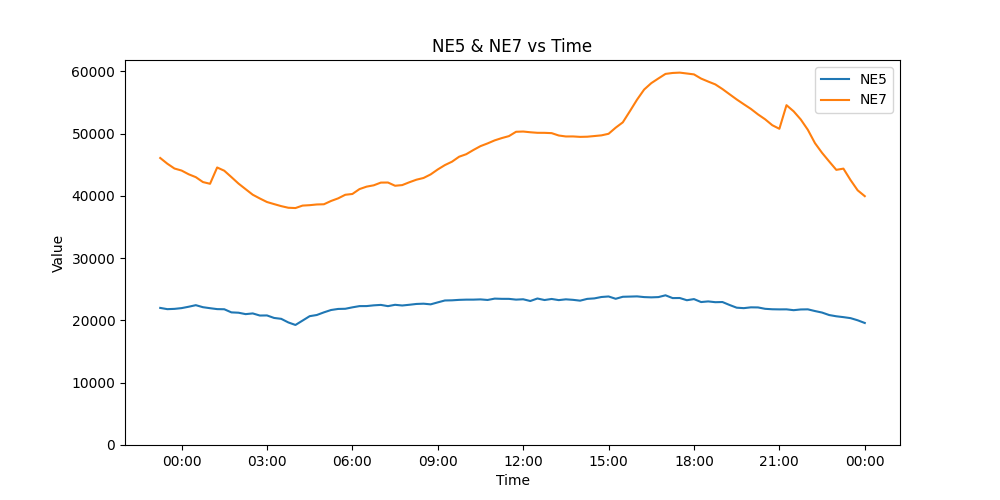

In [15]:
time = np.array(dayone.index)

plt.figure(figsize=(10, 5))

plt.plot(time, dayone['Value_NE5'], label='NE5')
plt.plot(time, dayone['Value_NE7'], label='NE7')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NE5 & NE7 vs Time')
plt.legend()
plt.ylim(bottom=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

You are responsible in the data analysis team for determining which electricity lines need renewal and how to competitively price electricity in the Zurich region.

- What norm would you use to determine the maximum load on the system? Calculate it and comment on the result.
- What norm would be ideal for pricing electricity appropriately? If it is determined by the overall consumption, program a norm to calculate it.

In [16]:
ne5_infinity_norm = np.max(np.abs(dayone['Value_NE5']))
ne7_infinity_norm = np.max(np.abs(dayone['Value_NE7']))

print("Infinity norm of NE5:", ne5_infinity_norm)
print("Infinity norm of NE7:", ne7_infinity_norm)

Infinity norm of NE5: 24033.7434
Infinity norm of NE7: 59784.942936


The code below produces the energy consumption graph for a timespan of multiple years:

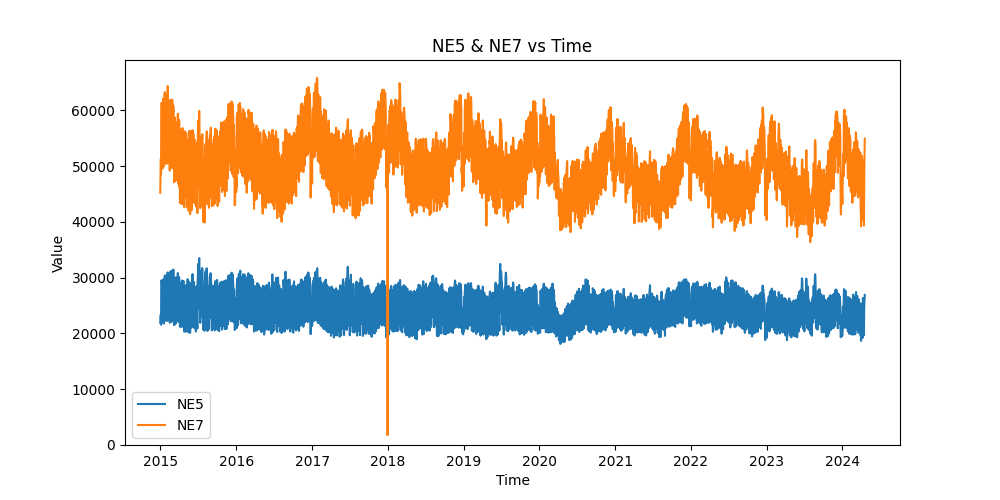

In [17]:
daily_data = data.resample('D').mean()
time = np.array(daily_data.index)

plt.figure(figsize=(10, 5))

plt.plot(time, daily_data['Value_NE5'], label='NE5')
plt.plot(time, daily_data['Value_NE7'], label='NE7')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NE5 & NE7 vs Time')
plt.legend()
plt.ylim(bottom=0)

plt.show()

Consider the plot above. Do any of your previous conclusions regarding norms change with this new data? [Open Question]

In [18]:
# Open Solution

_Open Solution:_

--------- 

## Exercise 4a: Uncertainties in Control Systems

After excelling in your studies at ETHz, you have risen the ranks at XYZ-Corp. to become lead engineer for a variety of automobile and aerospace control products. 

As part of an aileron controller to reduce wingtip flutter, three of your engineers approach you with three different controllers. All appear to be stable and fulfill the performance goals. The engineers leave their control matrices, X, Y, and Z, on your desk, each convinced their controller is the best.

However, you recall from your Control Systems II lecture that model uncertainties can throw off a controller easily, especially in the case of an aerodynamic scenario. Due to wind and other factors, the actual controller matrix ends up looking like $L \pm \epsilon \Delta L$, where $\epsilon \in (-1, 1)$. Therefore, you (painstakingly) calculate the uncertainity matrices $\Delta X$, $\Delta Y$, and $\Delta Z$.

$X = \begin{bmatrix}
-6 & 2 & 1 \\
2 & -9 & 4 \\
1 & 4 & -9 
\end{bmatrix}  $,    $\lambda_X = [-3.30054422, -7.62276318 ,-13.0766926]$,    $\Delta X = \begin{bmatrix}
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
c_1 & c_2 & c_3 
\end{bmatrix}$

$Y = \begin{bmatrix}
-2 & 1 & -3 \\
0 & -2 & 1 \\
0 & -4 & -3 
\end{bmatrix}  $,    $\lambda_Y = [-2. +0.j, -2.5+1.93649167j ,-2.5-1.93649167j]$,    $\Delta Y = \begin{bmatrix}
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
c_1 & c_2 & c_3 
\end{bmatrix}$

$Z = \begin{bmatrix}
-5 & 2 & 0 \\
2 & -5 & 0 \\
-3 & 4 & -6 
\end{bmatrix}  $,    $\lambda_Z = [-6, -3, -7]$,    $\Delta Z = \begin{bmatrix}
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
c_1 & c_2 & c_3 
\end{bmatrix}$

Use the **Bauer-Fike Theorem** to determine which of the controllers (X, Y, or Z) is in danger of becoming unstable. The **Bauer-Fike Theorem** states that:

*No eigenvalue of $L + \Delta L$ can differ from an eigenvalue of $L$ by more than $\min(||L||_1 ||L^{-1}||_1 \cdot ||\Delta L||_1, ||L||_{\infty} ||L^{-1}||_{\infty} \cdot ||\Delta L||_{\infty})$*

[Further Reading](https://www-users.cse.umn.edu/~boley/publications/papers/BF.pdf)

In [19]:
def eigenvalue_deviation(L: np.ndarray, delL: np.ndarray) -> float:
    """
    Calculate $min(||L||_1 ||L^{-1}||_1 \cdot ||\Delta L||_1, ||L||_{\infty} ||L^{-1}||_{\infty} \cdot ||\Delta L||_{\infty})$ 

    Parameters:
    - L (np.ndarray): The original matrix.
    - delL (np.ndarray): The perturbation matrix.

    Returns:
    -> float: The deviation value.
    """

    if L is None or delL is None or not isinstance(L, np.ndarray) or not isinstance(delL, np.ndarray):
        raise ValueError("Input matrices are invalid")
    if L.shape != delL.shape:
        raise ValueError("Input matrices must be of the same shape")

    norm1 = matrixPnorm(L, 1) * matrixPnorm(np.linalg.inv(L), 1) * matrixPnorm(delL, 1)
    normInf = matrixInfnorm(L) * matrixInfnorm(np.linalg.inv(L)) * matrixInfnorm(delL)
    return min(norm1, normInf)

In [20]:
X = np.array([[-6, 2, 1], [2, -9, 4], [1, 4, -9]])
Y = np.array([[-2, 1, -3], [0, -2, 1], [0, -4, -3]])
Z = np.array([[-5, 2, 0], [2, -5, 0], [-3, 1, -6]])

delX = np.array([[0.8, 0.4, 0.3], [-0.5, 0.6, -0.2], [0.7, 0.9, -0.8]])
delY = np.array([[-0.3, 0.9, 0.5], [-0.4, 0, 0.1], [0.6, 0.3, 0.0]])
delZ = np.array([[-0.1, 0.2, 0.1], [0.2, -0.1, -0.1], [0.3, 0.2, 0.2]])

deviation_X = eigenvalue_deviation(X, delX)
deviation_Y = eigenvalue_deviation(Y, delY)
deviation_Z = eigenvalue_deviation(Z, delZ)

print(f"Eigenvalues for X: {np.linalg.eigvals(X)}")
print(f"Eigenvalues for Y: {np.linalg.eigvals(Y)}")
print(f"Eigenvalues for Z: {np.linalg.eigvals(Z)}")

print(f"Deviation for X: {deviation_X}")
print(f"Deviation for Y: {deviation_Y}")
print(f"Deviation for Z: {deviation_Z}")

Eigenvalues for X: [ -3.30054422  -7.62276318 -13.0766926 ]
Eigenvalues for Y: [-2. +0.j         -2.5+1.93649167j -2.5-1.93649167j]
Eigenvalues for Z: [-6. -3. -7.]
Deviation for X: 11.379939209726443
Deviation for Y: 17.849999999999998
Deviation for Z: 2.3333333333333335


As you can see, only controller $Z$ can guarantee that the eigenvalues will not cross into the right-half plane (unstable). Of course, this is a crude test to check the maximum deviations of eigenvalues.

## Exercise 4b: Maximum Input Direction

Now you have taken this controller and intend to further develop it. A member of the structural team wants to know how much the aileron needs to deflect using this controller. Therefore, you must find the maximum input direction.

Using SVD (Singular-Value-Decomposition), determine the input direction for which the output is maximal. Report both the input and the output.

In [49]:
def maxinputdir(A: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Find the input and output direction corresponding to the largest singular value.

    Parameters:
    - A (np.ndarray): The input matrix.

    Returns:
    -> Tuple[np.ndarray, float, np.ndarray]: The input direction, the largest singular value, and the output direction.
    """

    U, S, Vt = np.linalg.svd(A)
    max_index = np.argmax(S)
    
    input_dir = Vt[max_index]
    max_singular_value = S[max_index]
    output_dir = U[max_index]


    return input_dir, max_singular_value, output_dir

In [51]:
input_dir, max_singular_value, output_dir = maxinputdir(Z)
print(f"Input direction: {input_dir}")
print(f"Largest singular value: {max_singular_value}")
print(f"Output direction: {output_dir}")

Input direction: [ 0.7014386  -0.50991072  0.49797083]
Largest singular value: 8.215750118708842
Output direction: [-0.55101657  0.36846322 -0.74874268]


In [85]:
def subplot_svd(A: np.ndarray, i: np.ndarray, j: np.ndarray, k: np.ndarray, v1: np.ndarray, v2: np.ndarray, v3: np.ndarray, dir: np.ndarray = None) -> None:
    fig1 = plt.figure(figsize=(3, 3))
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='k', label='i (1,0,0)')
    ax1.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='k', label='j (0,1,0)')
    ax1.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='k', label='k (0,0,1)')
    if dir is not None:
        ax1.quiver(0, 0, 0, dir[0], dir[1], dir[2], color='r', label='Input direction')

    # Generate points on the unit sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones_like(u), np.cos(v))

    # Rotate and translate points to align with the given vectors
    transform_matrix = np.vstack((i, j, k))
    points = np.vstack((x.flatten(), y.flatten(), z.flatten())).T
    transformed_points = np.dot(points, transform_matrix)

    ax1.plot_surface(transformed_points[:, 0].reshape(x.shape),
                    transformed_points[:, 1].reshape(y.shape),
                    transformed_points[:, 2].reshape(z.shape),
                    alpha=0.5)

    # Set the aspect ratio of the axes to be equal
    ax1.set_box_aspect([np.ptp(transformed_points[:, 0]), np.ptp(transformed_points[:, 1]), np.ptp(transformed_points[:, 2])])

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    plt.show()

In [88]:
def plot_svd3x3(A: np.ndarray) -> None:
    """
    Plot the singular values of a matrix.

    Parameters:
    - A (np.ndarray): The input matrix.
    """
    if not isinstance(A, np.ndarray) or len(A.shape) != 2:
        raise ValueError("Input must be a 2D numpy array")
    
    U, S, Vt = np.linalg.svd(A)
    S = np.diag(S)
    input_dir, max_singular_value, output_dir = maxinputdir(A)

    i1 = np.array([1, 0, 0])
    j1 = np.array([0, 1, 0])
    k1 = np.array([0, 0, 1])
    subplot_svd(A, i1, j1, k1, i1, j1, k1, input_dir)

    i2 = Vt@i1
    j2 = Vt@j1
    k2 = Vt@k1
    subplot_svd(A, i2, j2, k2, i2, j2, k2, Vt@input_dir)

    i3 = S[0] * i1
    j3 = S[1] * j1
    k3 = S[2] * k1
    v1 = S@Vt@i1
    v2 = S@Vt@j1
    v3 = S@Vt@k1
    subplot_svd(A, i3, j3, k3, v1, v2, v3, S@Vt@input_dir)

    i4 = U@i3
    j4 = U@j3
    k4 = U@k3
    output_dir = U@S@Vt@input_dir
    subplot_svd(A, i4, j4, k4, U@v1, U@v2, U@v3, output_dir)

    subplot_svd(A, A@i1, A@j1, A@k1, A@i1, A@j1, A@k1, A@input_dir)
    

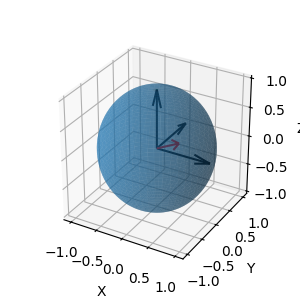

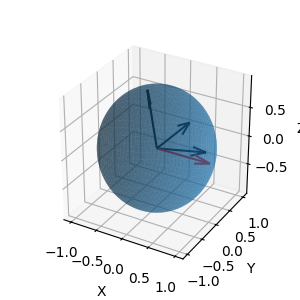

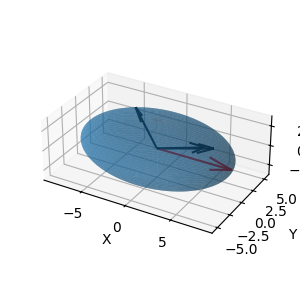

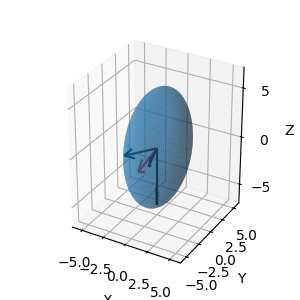

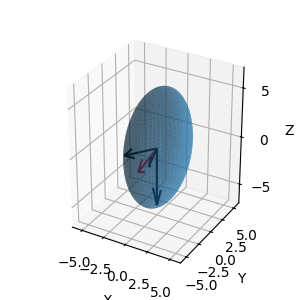

In [89]:
plot_svd3x3(Z)